In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('regressionOutliers.csv')
data.head()

,X,Y
0,0.655210,-5.1815
1,0.752910,-4.6796
2,0.810860,-3.6935
3,0.048427,-1.2416
4,0.414710,-2.1358


In [3]:
X=data['X']
Y=data['Y']

In [4]:
X=np.array(X)
Y=np.array(Y)

Text(0, 0.5, 'Y')

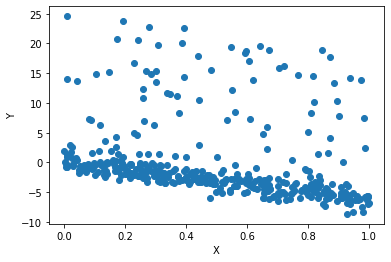

In [5]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

In [58]:

#Banana_width=4
#Banana_length=8
#Apple_width=6
#Apple_length=6


N=50
std=1.5

bananas_width=np.random.normal(4,std,N)
bananas_length=np.random.normal(8,std,N)

apples_width=np.random.normal(6,std,N)
apples_length=np.random.normal(6,std,N)

width=np.concatenate((bananas_width,apples_width))
length=np.concatenate((bananas_length,apples_length))
#print(width.shape)
#print(length.shape)

X=np.array([width,length]).T
#print(X.shape)
#X after transpose: X=[200 rows of width,200 rows of length]
#first 100 rows are bananas
#second 100 rows are apples
#banana label is zero
#apple label is one


bananas_label=np.zeros(N, dtype='int')
apples_label=np.ones(N, dtype='int')

Y=np.concatenate((bananas_label,apples_label))

Text(0, 0.5, 'Length')

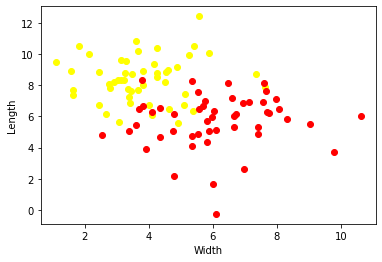

In [59]:
#bananas
plt.scatter(X[0:N,0],X[0:N,1],c='yellow')

#apples
plt.scatter(X[N:,0],X[N:,1],c='red')


plt.xlabel('Width')
plt.ylabel('Length')


In [60]:
#test_data

N_test=50
std=1.5

banana_width_test=np.random.normal(4,std,N_test)
banana_length_test=np.random.normal(8,std,N_test)
apple_width_test=np.random.normal(6,std,N_test)
apple_length_test=np.random.normal(6,std,N_test)

width_test=np.concatenate((banana_width_test,apple_width_test))
length_test=np.concatenate((banana_length_test,apple_length_test))
x_test=np.array([width_test,length_test]).T
#print(type(x_test))
#print(x_test.shape)
#print(x_test)
banana_label_test=np.zeros(N_test, dtype='int')
apple_label_test=np.ones(N_test,dtype='int')

y_test=np.concatenate((banana_label_test,apple_label_test))

In [61]:
class KnearestNeighbors:
   
    def __init__(self,k):
        self.k=k
        
    #train    
    def fit(self,X_train,y_train):
        
        self.X_train=X_train
        self.y_train=y_train
        
        #to know the count of classes
        self.number_of_classes=len(np.unique(y_train))
        
    #test    
    
    def nearNeighbors(self,x_test):
        
        #for i in range(x_test):
        distance=np.sqrt(np.sum((x_test-self.X_train)**2,axis=1))
       
       
        #print("distance.shape=",distance.shape)
       
        #distance=np.sqrt(np.sum((x_test-self.X_train)**2,axis=1))
        near_neighbors=np.argsort(distance)[0:self.k]
        #print(distance)
        
        return near_neighbors
        
    def predict(self,x_test):
        
        near_neighbors=self.nearNeighbors(x_test)
        
        #print(near_neighbors)#print the index of the nearest friuts 
        #print(self.y_train[near_neighbors])#print the lables of the nearest fruits
        #print(np.bincount(self.y_train[near_neighbors]))
        #print(np.argmax(np.bincount(self.y_train[near_neighbors])))#print the index of nearest
        y=np.argmax(np.bincount(self.y_train[near_neighbors]))
        #0=banana
        #1=apple
        return y
    
    def evaluate(self,y_pred,i):
        if y_pred==y_test[i]:
            return 1
        else:
            return 0
        
            
        

In [62]:

num=0 #Number of correct prediction
knn=KnearestNeighbors(5)
knn.fit(X,Y)
#knn_test=KnearestNeighbors(5)
#new_fruit=np.array([6,6.5])
        
fruits={0:'banana',
       1:'appale'}


for i in range(len(x_test)):
   #for j in range(len(x_test[i])):
        #rint(x_test[i])
        #rint(x_test[i][j])
        #nn.predict(x_test[i][j])
        y_pred= knn.predict(x_test[i])
        s=knn.evaluate(y_pred,i)
        num=num+s
        
        
        
       
        print(x_test[i],',Predicted fruit is ' , fruits[y_pred])
        
print("Number of correct prediction",num)
accuracy=(num/(N_test*2))*100
print("The accuracy of the model is : ",accuracy)


       
    
    

    


[ 3.29303743 10.1321015 ] ,Predicted fruit is  banana
[3.55862896 8.28001283] ,Predicted fruit is  banana
[5.75252266 7.68507066] ,Predicted fruit is  appale
[4.60837425 8.04679072] ,Predicted fruit is  banana
[4.26234489 8.38549862] ,Predicted fruit is  banana
[1.97629518 9.20694256] ,Predicted fruit is  banana
[6.96526719 8.62682913] ,Predicted fruit is  appale
[2.95199355 8.35450546] ,Predicted fruit is  banana
[4.89127502 6.60704253] ,Predicted fruit is  banana
[4.44723265 5.95268594] ,Predicted fruit is  appale
[2.11511197 8.47578314] ,Predicted fruit is  banana
[3.57705426 8.57462488] ,Predicted fruit is  banana
[4.36690213 8.23012055] ,Predicted fruit is  banana
[ 4.95862165 11.38452781] ,Predicted fruit is  banana
[2.28811487 8.01934993] ,Predicted fruit is  banana
[6.64565443 6.40531044] ,Predicted fruit is  appale
[5.50614022 7.95817511] ,Predicted fruit is  appale
[5.13051022 9.25888117] ,Predicted fruit is  banana
[2.4542384  5.72183435] ,Predicted fruit is  banana
[5.83160